# Análise dos acidentes de trânsito de Porto Alegre

## Objetivo

Você atua no departamento de análise de dados da EPTC e o time de gestores(as) precisa de algumas informações sobre os acidentes para avaliar necessidades de ações para evitar novas ocorrências.

Assim, com base nos registros disponibilizados, você terá que responder as seguintes perguntas:

**Perguntas**


1.   Como está a evolução dos acidentes nos últimos anos?
2.   O número de acidentes diminuiu de 2019 para 2020?
3.   Quais são os tipos de acidentes com maior ocorrência?
4.   Qual a frequência de óbitos em acidentes nos últimos anos?
5.   Qual o tipo de acidente com maior número de óbitos?


Adicionalmente, você é instigado a realizar uma apresentação, com os locais dos acidentes ocorridos ao longo desse ano.

**Nota**

Abuse das visões gráficas para embasar sua análise.
https://dadosabertos.poa.br/dataset/acidentes-de-transito-acidentes

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
URL = 'https://dadosabertos.poa.br/dataset/d6cfbe48-ee1f-450f-87f5-9426f6a09328/resource/b56f8123-716a-4893-9348-23945f1ea1b9/download/cat_acidentes.csv'

df_raw = pd.read_csv(URL, sep=';')

In [4]:
df_raw.columns

Index(['data_extracao', 'predial1', 'queda_arr', 'data', 'feridos',
       'feridos_gr', 'mortes', 'morte_post', 'fatais', 'auto', 'taxi',
       'lotacao', 'onibus_urb', 'onibus_met', 'onibus_int', 'caminhao', 'moto',
       'carroca', 'bicicleta', 'outro', 'cont_vit', 'ups', 'patinete',
       'idacidente', 'longitude', 'latitude', 'log1', 'log2', 'tipo_acid',
       'dia_sem', 'hora', 'noite_dia', 'regiao', 'consorcio'],
      dtype='object')

In [6]:
df_raw.dtypes

data_extracao     object
predial1           int64
queda_arr        float64
data              object
feridos            int64
feridos_gr         int64
mortes             int64
morte_post         int64
fatais             int64
auto               int64
taxi               int64
lotacao            int64
onibus_urb         int64
onibus_met         int64
onibus_int         int64
caminhao           int64
moto               int64
carroca            int64
bicicleta          int64
outro              int64
cont_vit           int64
ups                int64
patinete           int64
idacidente         int64
longitude        float64
latitude         float64
log1              object
log2              object
tipo_acid         object
dia_sem           object
hora              object
noite_dia         object
regiao            object
consorcio         object
dtype: object

In [7]:
df_raw['data'].value_counts()

2016-08-29 00:00:00    69
2016-04-11 00:00:00    67
2018-11-19 00:00:00    67
2016-03-18 00:00:00    66
2016-10-06 00:00:00    66
                       ..
2021-12-14 00:00:00     1
2021-12-19 00:00:00     1
2018-11-04 01:00:00     1
3031-04-03 00:00:00     1
5021-08-06 00:00:00     1
Name: data, Length: 2166, dtype: int64

In [8]:
df_raw[ (df_raw['data'] == '3031-04-03 00:00:00') | (df_raw['data'] == '5021-08-06 00:00:00' ) | \
        (df_raw['data'] == '2202-09-30 00:00:00') ]

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
62986,2021-12-01 01:35:32,745,0.0,3031-04-03 00:00:00,1,0,0,0,0,1,...,-51.191227,-30.189580,ESTR PONTA GROSSA,NaN,ABALROAMENTO,DOMINGO,17:30:00.0000000,DIA,SUL,NaN
67888,2021-12-01 01:35:32,12,0.0,5021-08-06 00:00:00,0,0,0,0,0,1,...,-51.176658,-30.039595,AV PALMEIRA,NaN,ABALROAMENTO,SEGUNDA-FEIRA,12:00:00.0000000,DIA,LESTE,NaN
69795,2021-12-01 01:35:32,250,0.0,2202-09-30 00:00:00,0,0,0,0,0,1,...,-51.150160,-30.063864,AV ANTONIO CARVALHO,AV IPIRANGA,ABALROAMENTO,QUINTA-FEIRA,08:40:00.0000000,DIA,LESTE,NaN


In [9]:
drop_lines = df_raw[ (df_raw['data'] == '3031-04-03 00:00:00') | (df_raw['data'] == '5021-08-06 00:00:00' ) | \
                     (df_raw['data'] == '2202-09-30 00:00:00') ].index

In [10]:
df_analise = df_raw.drop(index=drop_lines, axis=0)

In [11]:
df_analise

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2021-12-01 01:35:32,0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,...,0.000000,0.000000,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2021-12-01 01:35:32,8487,0.0,2016-01-01 00:00:00,0,0,0,1,1,1,...,-51.095216,-30.134588,ESTR JOAO DE OLIVEIRA REMIAO,NaN,CHOQUE,SEXTA-FEIRA,12:00:00.0000000,DIA,LESTE,NaN
2,2021-12-01 01:35:32,0,0.0,2016-01-02 00:00:00,1,0,0,0,0,0,...,-51.200627,-30.004450,AV EDVALDO PEREIRA PAIVA,NaN,QUEDA,SÁBADO,06:30:00.0000000,DIA,NORTE,NaN
3,2021-12-01 01:35:32,240,0.0,2016-01-02 00:00:00,1,0,0,0,0,0,...,-51.218421,-30.046960,AV ERICO VERISSIMO,NaN,ABALROAMENTO,SÁBADO,18:30:00.0000000,NOITE,CENTRO,STS
4,2021-12-01 01:35:32,2084,0.0,2016-01-02 00:00:00,3,0,0,0,0,1,...,-51.129850,-30.093210,ESTR JOAO DE OLIVEIRA REMIAO,NaN,CHOQUE,SÁBADO,20:15:00.0000000,NOITE,LESTE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72244,2021-12-01 01:35:32,1300,0.0,2021-11-19 00:00:00,0,0,0,0,0,2,...,-51.213743,-30.047274,AV IPIRANGA,AV AZENHA,ABALROAMENTO,SEXTA-FEIRA,14:40:00.0000000,DIA,CENTRO,NaN
72245,2021-12-01 01:35:32,0,0.0,2021-11-25 00:00:00,0,0,0,0,0,2,...,-51.158859,-30.027660,AV VERISSIMO DE AMARAL,R JUNCAL,ABALROAMENTO,QUINTA-FEIRA,12:30:00.0000000,DIA,NORTE,NaN
72246,2021-12-01 01:35:32,8207,0.0,2021-11-24 00:00:00,0,0,0,0,0,2,...,-51.116371,-29.982895,AV ASSIS BRASIL,NaN,ABALROAMENTO,QUARTA-FEIRA,17:40:00.0000000,DIA,NORTE,NaN
72247,2021-12-01 01:35:32,124,0.0,2021-11-23 00:00:00,0,0,0,0,0,2,...,-51.197213,-29.995971,AV A J RENNER,NaN,COLISÃO,TERÇA-FEIRA,17:00:00.0000000,DIA,NORTE,NaN


In [12]:
df_analise['data'].value_counts(ascending=False)

2016-08-29 00:00:00    69
2016-04-11 00:00:00    67
2018-11-19 00:00:00    67
2016-03-18 00:00:00    66
2016-10-06 00:00:00    66
                       ..
2021-11-29 00:00:00     2
2021-11-28 00:00:00     2
2021-12-14 00:00:00     1
2018-11-04 01:00:00     1
2021-12-19 00:00:00     1
Name: data, Length: 2163, dtype: int64

In [13]:
 df_analise['data'] = pd.to_datetime(df_analise['data'])

<AxesSubplot:xlabel='data'>

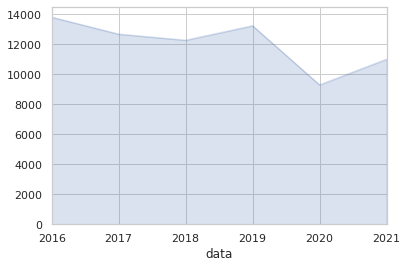

In [108]:
df_analise.groupby(pd.Grouper(key='data',freq='y'))['idacidente'].count().plot(kind='area', alpha = .2)

In [15]:
df_analise.isnull().sum().sort_values(ascending = False)

consorcio        69014
log2             51396
longitude        12054
latitude         12054
hora               103
log1                66
regiao              11
tipo_acid            0
dia_sem              0
predial1             0
noite_dia            0
idacidente           0
patinete             0
ups                  0
cont_vit             0
outro                0
bicicleta            0
data_extracao        0
moto                 0
caminhao             0
onibus_int           0
onibus_met           0
onibus_urb           0
lotacao              0
taxi                 0
auto                 0
fatais               0
morte_post           0
mortes               0
feridos_gr           0
feridos              0
data                 0
queda_arr            0
carroca              0
dtype: int64

In [102]:
df_analise.groupby([pd.Grouper(key='data',freq='Y'), 'tipo_acid'])['idacidente'].count()

data        tipo_acid     
2016-12-31  ABALROAMENTO      6631
            ATROPELAMENTO     1073
            CAPOTAGEM           43
            CHOQUE            1111
            COLISÃO           4192
            EVENTUAL           156
            INCÊNDIO             5
            QUEDA              577
            TOMBAMENTO          12
2017-12-31  ABALROAMENTO      6331
            ATROPELAMENTO      889
            CAPOTAGEM           40
            CHOQUE             975
            COLISÃO           3819
            EVENTUAL           185
            INCÊNDIO             3
            NAO CADASTRADO       1
            QUEDA              412
            TOMBAMENTO          16
2018-12-31  ABALROAMENTO      5911
            ATROPELAMENTO      830
            CAPOTAGEM           51
            CHOQUE             982
            COLISÃO           3834
            EVENTUAL           191
            INCÊNDIO             4
            NAO CADASTRADO      13
            QUEDA           

<AxesSubplot:xlabel='data'>

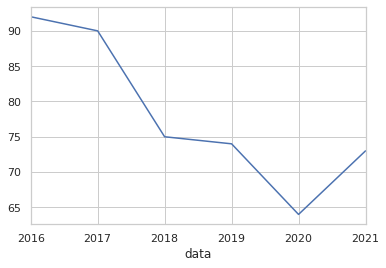

In [100]:
df_analise.groupby(pd.Grouper(key='data',freq='y'))['fatais'].sum().plot(kind='line')

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
fatalidades = df_analise.groupby([pd.Grouper(key='data',freq='y'), 'tipo_acid'])['fatais'].sum()
fatalidades = pd.DataFrame(fatalidades)



In [80]:
fatalidades.reset_index(inplace=True)
fatalidades['ano'] = pd.DatetimeIndex(fatalidades['data']).year

<Figure size 1440x360 with 0 Axes>

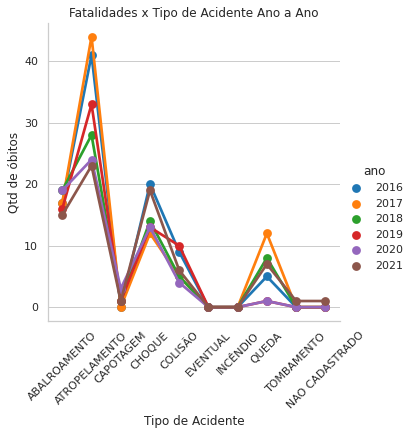

In [99]:
plt.figure(figsize=(20,5))

sns.set_theme(style="whitegrid")
sns.catplot(data=fatalidades, x='tipo_acid',hue='ano', y='fatais',palette="tab10",kind="point", linewidth=1.5)

plt.title('Fatalidades x Tipo de Acidente Ano a Ano')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Qtd de óbitos')

plt.xticks(rotation=45)
plt.show()




In [83]:
df_2021 = df_analise[df_analise['data'] > '2021-01-01 00:00:00']

In [20]:
df_2021.shape

(10980, 34)

In [21]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="tt_coordenadas_poa")

geocode    = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [22]:
df_mapa = df_2021[['tipo_acid','log1', 'latitude', 'longitude']]

In [23]:
df_mapa.shape

(10980, 4)

In [24]:
enderecos = df_mapa[df_mapa['latitude'].isnull()]

In [25]:
enderecos.shape

(664, 4)

In [26]:
def inserir_cidade_estado(endereco):
  return str(endereco) + ' Porto Alegre Brasil'

In [27]:
def ajustar_prefixo(endereco):
    x = str(endereco)
   
    if x[:2] == 'R ':
        return 'Rua ' + x[2:]
  
    elif x[:3] == 'AV ':
        return 'Avenida ' + x[3:]
 
    elif x[:5] == 'ESTR ':
        return 'Estrada ' + x[5:]

    elif x[:3] == 'TN ':
        return 'Tunel ' + x[3:]

    return x

In [28]:
from tqdm import tqdm
tqdm.pandas()

In [29]:
enderecos['log1'] = enderecos['log1'].progress_apply(inserir_cidade_estado)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 664/664 [00:00<00:00, 190611.04it/s]


In [30]:
enderecos['log1'] = enderecos['log1'].progress_apply(ajustar_prefixo)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 664/664 [00:00<00:00, 344084.24it/s]


In [32]:
%%time

enderecos['coordenadas'] = enderecos['log1'].progress_apply(geocode)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 664/664 [11:06<00:00,  1.00s/it]

CPU times: user 6.14 s, sys: 1.04 s, total: 7.18 s
Wall time: 11min 6s


In [34]:
enderecos['latitude'] = enderecos['coordenadas'].apply(lambda loc: loc.point[0] if loc else None)
enderecos['longitude'] = enderecos['coordenadas'].apply(lambda loc: loc.point[1] if loc else None)

In [35]:
enderecos['latitude'].isnull().sum()

43

In [36]:
faltantes = enderecos[enderecos['latitude'].isnull()]
enderecos.dropna(inplace=True)
enderecos.drop(columns='coordenadas')

,tipo_acid,log1,latitude,longitude
60799,COLISÃO,Avenida PRESIDENTE CASTELO BRANCO Porto Alegr...,-30.016269,-51.214217
60841,ABALROAMENTO,Rua DOM PEDRO II Porto Alegre Brasil,-30.016137,-51.186717
60918,COLISÃO,Avenida BORGES DE MEDEIROS Porto Alegre Brasil,-29.657825,-50.578725
60937,QUEDA,nossa sra aparecida Porto Alegre Brasil,-29.911510,-51.134428
60998,CHOQUE,Avenida JOAO PESSOA Porto Alegre Brasil,-30.046772,-51.211942
...,...,...,...,...
72084,ABALROAMENTO,Avenida ANTONIO CARVALHO Porto Alegre Brasil,-30.063167,-51.149637
72100,ABALROAMENTO,Avenida PROF OSCAR PEREIRA Porto Alegre Brasil,-30.054156,-51.211379
72135,ABALROAMENTO,Rua FRANCISCA PREZZI BOLOGNESI Porto Alegre B...,-30.158621,-51.176262
72137,ATROPELAMENTO,Estrada BARRO VERMELHO Porto Alegre Brasil,-30.162507,-51.133409


In [37]:
enderecos2 = df_mapa[~df_mapa['latitude'].isnull()]

In [38]:
mapa = pd.concat([enderecos, enderecos2])

In [44]:
mapa
mapa_reduzido = mapa.sample(50)

In [45]:
import folium

In [46]:
poa = folium.Map(
        location=[-30.06, -51.17],
        zoom_start=12
)

In [47]:
for i, linha in mapa_reduzido.iterrows():
  folium.Marker([linha['latitude'], linha['longitude']], popup=linha['tipo_acid'] ).add_to(poa)

In [48]:
poa